---

## **MACHINE LEARNING PROJECT -** ***Sentiment analysis on Amazon food reviews*** 

---

## **GROUP MEMBERS :**

#### Amith PS - CB.SC.I5DAS18003
#### Karthik Raj VP - CB.SC.I5DAS18016
#### Linci Felicita P - CB.SC.I5DAS18022
#### Parameshwari S - CB.SC.I5DAS18026

##**Reducing the data size**

In [ ]:
import pandas
import random

df = pandas.read_csv("/content/Reviews.csv")
n = df.shape[0]
s = int(n / 10)
print("Original data size - ", df.shape)

Original data size -  (568454, 10)


In [ ]:
skip = sorted(random.sample(range(n), n-s))
df1 = pandas.read_csv("/content/Reviews.csv", skiprows = skip)

In [ ]:
print("Reduced data size - ", df1.shape)

Reduced data size -  (56845, 10)


In [ ]:
from google.colab import files
df1.to_csv('filename.csv') 
files.download('filename.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**1. Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.utils import resample

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##**2. Data Exploration**

In [ ]:
df = pd.read_csv("/content/reviews.csv")
df.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
1,1,14,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",2,2,4,1288915200,fresh and greasy!,good flavor! these came securely packed... the...
2,2,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...
3,3,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
4,4,44,B001EO5QW8,A17DW6SUOC70DJ,Mother of 9,0,0,5,1255392000,Good Hot Breakfast,McCann's Oatmeal is a good quality choice. Ou...


In [ ]:
df.shape

(56845, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56845 entries, 0 to 56844
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              56845 non-null  int64 
 1   Id                      56845 non-null  int64 
 2   ProductId               56845 non-null  object
 3   UserId                  56845 non-null  object
 4   ProfileName             56844 non-null  object
 5   HelpfulnessNumerator    56845 non-null  int64 
 6   HelpfulnessDenominator  56845 non-null  int64 
 7   Score                   56845 non-null  int64 
 8   Time                    56845 non-null  int64 
 9   Summary                 56843 non-null  object
 10  Text                    56845 non-null  object
dtypes: int64(6), object(5)
memory usage: 4.8+ MB


In [ ]:
df.describe()

,Unnamed: 0,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,56845.000000,56845.000000,56845.000000,56845.000000,56845.000000,5.684500e+04
mean,28422.000000,284176.786173,1.706236,2.189304,4.186032,1.296123e+09
std,16409.882363,164040.710421,6.306909,7.135228,1.304723,4.799087e+07
min,0.000000,10.000000,0.000000,0.000000,1.000000,9.408096e+08
25%,14211.000000,141414.000000,0.000000,0.000000,4.000000,1.271203e+09
50%,28422.000000,284765.000000,0.000000,1.000000,5.000000,1.310861e+09
75%,42633.000000,426629.000000,2.000000,2.000000,5.000000,1.332547e+09
max,56844.000000,568454.000000,491.000000,569.000000,5.000000,1.351210e+09


##**3. Data Visualisation**

In [ ]:
score = df.groupby('Score')[['Id']].count()
score.reset_index(inplace = True)
score.rename(columns = {'Id' : 'Count', 'Score' : 'Rating'}, inplace = True)
fig1 = px.bar(score, x = 'Rating', y = 'Count', title = 'Distribution of Ratings')
fig1.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Time'],unit = 's')
df['Year'] = pd.DatetimeIndex(df['Date']).year
year = df.groupby('Year')[['Id']].count()
year.reset_index(inplace = True)
year.rename(columns = {'Id' : 'Number of Reviews'}, inplace = True)
fig2 = px.line(year, x = 'Year', y = 'Number of Reviews', title = 'Review trend from 1999 to 2012')
fig2.show()

In [ ]:
year_score = df.groupby(['Year', 'Score'])[["Id"]].count()
year_score.reset_index(inplace = True)
year_score.rename(columns = {'Id' : 'Number of Reviews', 'Score' : 'Rating'}, inplace = True)
fig3 = px.line(year_score, x = 'Year', y = 'Number of Reviews', color = 'Rating', title = 'Review trend of the Ratings from 1999 to 2012')
fig3.show()

In [ ]:
df_target = df.copy()#[df['Score'] != 3]
t = df['Score'].apply(lambda x: 'Positive' if x > 3 else ('Negative' if x < 3 else 'Neutral'))
df_target['Target'] = t
target = df_target.groupby('Target')[['Id']].count()
target.reset_index(inplace = True)
target.rename(columns = {'Id' : 'Number of Reviews', 'Target' : 'Score'}, inplace = True)
fig4 = px.bar(target, x = 'Score', y = 'Number of Reviews', title = 'Distribution of Target variable')
fig4.show()

In [ ]:
df_words = df_target.Text.apply(lambda x: len(x.split(" ")))
df_words = df_words.to_frame()
df_words.rename(columns = {'Text' : 'Length of words'}, inplace = True)
fig5 = px.histogram(df_words, x = 'Length of words', nbins = 100, title = 'Distribution of number of words per review')
fig5.show()

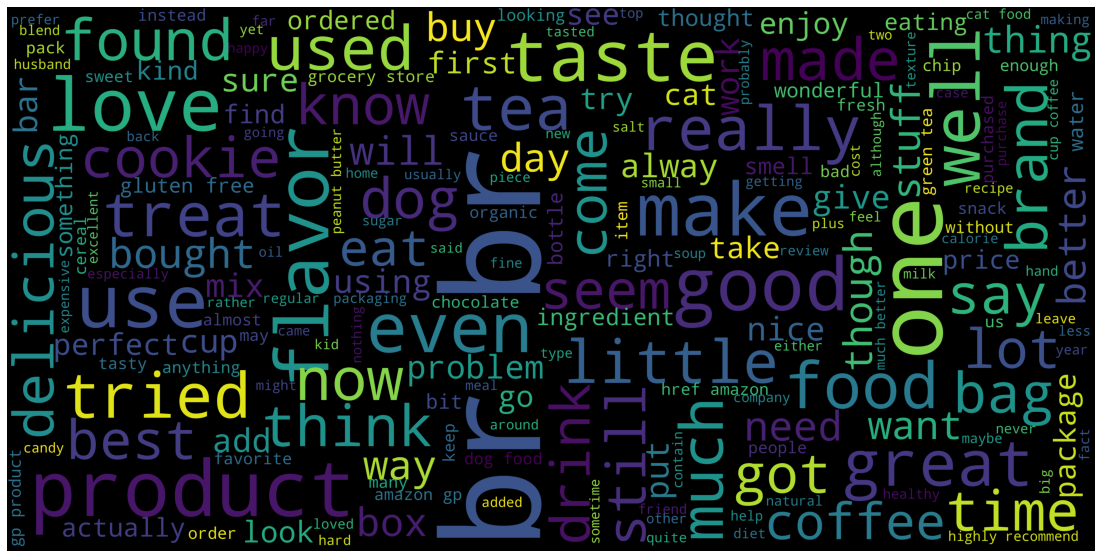

In [ ]:
word_cloud_text = ''.join(df_target['Text'])
wordcloud = WordCloud(max_font_size = 100,
                      max_words = 200,
                      background_color = "black",
                      scale = 10,
                      width = 800,
                      height = 400
                     ).generate(word_cloud_text)

plt.figure(figsize = (20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##Handling imbalanced data

In [ ]:
newdf = df_target.groupby('Target')

for i,j in newdf:
    if i == "Negative":
        newdf_neg = j
    if i == "Neutral":
        newdf_neu = j
    if i == "Positive":
        newdf_pos = j

In [ ]:
res1 = resample(newdf_neg, n_samples= 44000, replace=True, random_state=42)

In [ ]:
res2 = resample(newdf_neu, n_samples= 44000, replace=True, random_state=42)
res21 = resample(newdf_neu, n_samples= 8000, replace=True, random_state=42)

In [ ]:
res31 = resample(newdf_pos, n_samples= 8000, replace=True, random_state=42)

In [ ]:
new_df = pd.concat([res1, newdf_pos, res2])

In [ ]:
new_df1 = pd.concat([res21, newdf_neg, res31])

In [ ]:
target = new_df1.groupby('Target')[['Id']].count()
target.reset_index(inplace = True)
target.rename(columns = {'Id' : 'Number of Reviews', 'Target' : 'Score'}, inplace = True)
fig5 = px.bar(target, x = 'Score', y = 'Number of Reviews', title = 'Distribution of Target variable')
fig5.show()

In [ ]:
target = new_df.groupby('Target')[['Id']].count()
target.reset_index(inplace = True)
target.rename(columns = {'Id' : 'Number of Reviews', 'Target' : 'Score'}, inplace = True)
fig5 = px.bar(target, x = 'Score', y = 'Number of Reviews', title = 'Distribution of Target variable')
fig5.show()

In [ ]:
new_df.shape

(132437, 14)

In [ ]:
new_df1.shape

(24121, 14)

##**4. Data cleaning and Text Preprocessing**

In [ ]:
#removing rows where HelpfulnessNumerator > HelpfulnessDenominator
df_final = new_df1[new_df1['HelpfulnessNumerator'] <= new_df1['HelpfulnessDenominator']]
df_final.shape

(24121, 14)

In [ ]:
def removeHtml(sentence): 
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern,' ',sentence)
    return cleaned_text

In [ ]:
def removePunctuations(sentence):
    cleaned_text  = re.sub('[^a-zA-Z]',' ',sentence)
    return cleaned_text

In [ ]:
def removeNumbers(sentence):
    sentence = re.sub("\S*\d\S*", " ", sentence).strip()
    return sentence

In [ ]:
def removeURL(sentence):
    text = re.sub(r"http\S+", " ", sentence)
    sentence = re.sub(r"www.\S+", " ", text)
    return sentence

In [ ]:
def removePatterns(sentence): 
    cleaned_text  = re.sub("\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b",' ',sentence)
    return cleaned_text

In [ ]:
def decontracted(x):
    x = str(x).lower()
    x = x.replace(",000,000", " m").replace(",000", " k").replace("′", "'").replace("’", "'")\
                           .replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")\
                           .replace("n't", " not").replace("what's", " what is").replace("it's", " it is")\
                           .replace("'ve", " have").replace("'m", " am").replace("'re", " are")\
                           .replace("he's", " he is").replace("she's", " she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("how's"," how has").replace("y'all"," you all")\
                           .replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")\
                           .replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")\
                           .replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")\
                           .replace("'cause'"," because")
    
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    return x

In [ ]:
default_stopwords = set(stopwords.words('english'))
excluding = set(['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])
custom_stopwords = default_stopwords - excluding

In [ ]:
lemmatizer = WordNetLemmatizer()
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
def lemmatize_sent(i):
  pos_tagged = nltk.pos_tag(nltk.word_tokenize(i))  
  wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
        lemmatized_sentence.append(word)
    else:        
        lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
  lemmatized_sentence = " ".join(lemmatized_sentence)
  return lemmatized_sentence

In [ ]:
preprocessed_text = [] 
stemed_word = ' '

for text in df_final['Text'].values:
    filtered_sentence = []
    text = decontracted(text)
    text = removeNumbers(text)
    text = removeHtml(text)
    text = removeURL(text)
    text = removePunctuations(text)
    text = removePatterns(text)
    
    for cleaned_words in text.split():
      if((cleaned_words not in custom_stopwords)):
        lematized_word = lemmatize_sent(cleaned_words)
        filtered_sentence.append(lematized_word)
    text = " ".join(filtered_sentence)  
    preprocessed_text.append(text.strip())

In [ ]:
df_final['Cleaned_text'] = preprocessed_text
df_final.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Date,Year,Target,Cleaned_text
10328,10328,103898,B002GQ6OEM,AJ5QNVTAIY1G1,Shannon T,0,2,3,1296604800,good for vegetarian,The taste is ok. Of course can't taste like it...,2011-02-02,2011,Neutral,taste ok course not taste like india restauran...
50296,50296,502370,B0083T5TAQ,A391YX65W2MR2H,Amazon Frequent Customer,2,3,3,1323734400,"Came packaged in a plain, brown paper bag",I bought this variety pack to go with the coff...,2011-12-13,2011,Neutral,bought variety pack go coffee maker purchase g...
41429,41429,414395,B000I2OOPW,A78KV5YH0SFTD,"P. Howard ""plhoward""",7,7,3,1171670400,easy sauce,this sauce is very easy to make. just add milk...,2007-02-17,2007,Neutral,sauce easy make add milk cream turn nice mild ...
5775,5775,58774,B005P0NA7U,A1HG82U7GY9531,J. Paschal,0,1,3,1318464000,Alba face cream,I have always like Alba brand products from th...,2011-10-13,2011,Neutral,always like alba brand product standpoint use ...
45856,45856,458169,B000LQORES,A2SQOTDT6O5570,"T. Tra ""Kreation""",0,3,3,1293148800,Some what disagree,"This noodle bowls just spicy, but tasteless. I...",2010-12-24,2010,Neutral,noodle bowl spicy tasteless would recommend tr...


In [ ]:
df_final['Text'][10328]

"The taste is ok. Of course can't taste like its from India restaurant.<br />I realize it's all vegetarian until I got the package, but I added meat when I cook it..."

In [ ]:
df_final['Cleaned_text'][10328]

'taste ok course not taste like india restaurant realize vegetarian get package add meat cook'

In [ ]:
df_final_words = df_final.Cleaned_text.apply(lambda x: len(x.split(" ")))
df_final_words = df_final_words.to_frame()
df_final_words.rename(columns = {'Cleaned_text' : 'Length of words'}, inplace = True)
fig6 = px.histogram(df_final_words, x = 'Length of words', nbins = 100, title = 'Distribution of number of words per review after Data preprocessing')
fig6.show()

##**5. Saving preprocessed dataset**

In [ ]:
from google.colab import files
df_final.to_csv('preprocessed1.csv') 
files.download('preprocessed1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>